# Lecture 8 - ANOVA and Linear Regression

**Analysis of variance**, or ANOVA, is a method for comparing multiple means across different groups.

---

## Example - One-Way ANOVA

*Note: One-Way ANOVA is also called Single-Factor or One-Factor ANOVA.*

Let's do a very simple example to build up our intuition about what ANOVA does.

Consider the following dataset:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = pd.DataFrame({'x1': [3, 2,  1], 'x2': [5, 3, 4], 'x3': [5, 6, 7]})
x

,x1,x2,x3
0,3,5,5
1,2,3,6
2,1,4,7


The question we would like to ask is, **"are the differences between each group's mean statistically significant?"**

### Step 1 - Calculating SST

First, we will calculate a statistic called the **total sum of squares** or SST.

To do this, we will calculate the **grand mean** $\bar{\mu}$ (which is actually the mean of the means):

In [8]:
x_bar = x.mean()
print('means of the groups:')
x_bar

means of the groups:


x1    2.0
x2    4.0
x3    6.0
dtype: float64

In [9]:
mu_bar = x_bar.mean()
print('grand mean =', mu_bar)

grand mean = 4.0


In [10]:
x.to_numpy().mean() # if sample sizes differ between groups, just get the mean of the dataset... not mean of means

4.0

SST is defined as,

\begin{align*}
   \text{SST} &= \sum_j \sum_i (x_j^{(i)} - \bar{\mu})^2
\end{align*}

where $x_j^{(i)}$ is the $i$th observation in group $j$.

In [11]:
sst = ((x.to_numpy() - mu_bar)**2).sum()
print('Total sum of squares (SST) =', sst)

Total sum of squares (SST) = 30.0


As a final note, notice that if you divide SST by its degrees of freedom $mn - 1$ ($m$ groups and $n$ observations per group), you will get the total variance!

Our goal is to determine how much of this total variance is because of the *variance within each group* versus the *variance between the groups*.

It should start becoming obvious why this method is called *analysis of variance*.

### Step 2 - Calculating SSW

Second, we will calculate a statistic called the **total sum of squares within groups** or SSW.

To do this, we will calculate the column-wise sum of squares, 

\begin{align*}
   \sum_i (x_j^{(i)} - \bar{x}_j)^2
\end{align*}

then take the sum of that,

\begin{align*}
   \text{SSW} &= \sum_j \sum_i (x_j^{(i)} - \bar{x}_j)^2
\end{align*}


In [12]:
ssw = ((x - x_bar)**2).sum().sum()
print('Sum of squares within (SSW) =', ssw)

Sum of squares within (SSW) = 6.0


Once again, notice that if we divide SSW by its degrees of freedom $m(n-1)$, you will get the total of the variances of each group!

### Step 3 - Calculating SSB

Third, we will calculate a statistic called the **total sum of squares between groups** or SSB.

This is measured by the variation between group means (where each observation per group contributes equally to this variation),

\begin{align*}
   \text{SSB} &= \sum_j \sum_i (\bar{x}_j - \bar{\mu})^2\\
   &= \sum_j n (\bar{x}_j - \bar{\mu})^2\\
\end{align*}


In [13]:
n = x.shape[0]
ssb = (n*(x_bar - mu_bar)**2).sum()
print('Sum of squares between (SSB) =', ssb)

Sum of squares between (SSB) = 24.0


Once again, notice that if we divide SSB by its degrees of freedom $m-1$, you will get the total of the variances of each group!

---

### Interlude

Notice that $\text{SST} = \text{SSW} + \text{SSB}$ and that their degrees of freedom also sum to each other.

In [14]:
print('      SST =', sst)
print('SSW + SSB =', ssw+ssb)

      SST = 30.0
SSW + SSB = 30.0


In [15]:
m = x.shape[1]

print('SST df =', m*n - 1)
print('SSW df =', m*(n - 1))
print('SSB df =', m - 1)

SST df = 8
SSW df = 6
SSB df = 2


---

### Step 4 - Calculating the F-statistic

Last, we will calculate the **F-statistic**,

\begin{align*}
   F &= \frac{\frac{\text{SSB}}{m-1}}{\frac{\text{SSW}}{m(n-1)}}
\end{align*}

F = Var between / Var within


We can use the F-statistic to test if the means are equal among all groups. Formally,

\begin{align*}
    H_0 &: \mu_j = \mu_0 \ \ \ \text{for} \ j = 1, \ldots, m\\ 
    H_1 &: \mu_j \neq \mu_0 \ \ \ \ \ \text{for at least one} \ j
\end{align*}

note:<br>
mu_0 is not defined; is also similar to mu_1 = mu_2 = mu_3


The F-statistic follows an [`F-distribution`](https://en.wikipedia.org/wiki/F-distribution) with two parameters (degrees of freedom) $\nu_1=m-1$ and $\nu_2=m(n-1)$.

In [16]:
F = (ssb/(m-1))/(ssw/(m*(n-1)))
F

12.0

In [9]:
F = (ssb/(m-1))/(ssw/(m*(n-1)))
F

12.0

In [17]:
from scipy.stats import f

p_value = 1 - f.cdf(F, m-1, m*(n-1))
p_value

0.008000000000000007

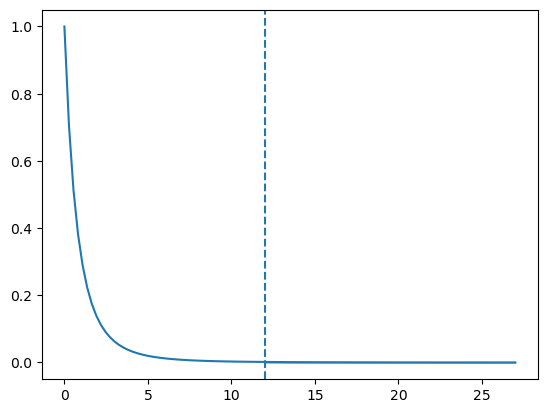

In [18]:
x_range = np.linspace(f.ppf(0.00, m-1, m*(n-1)), f.ppf(0.999, m-1, m*(n-1)), 100)
x_shade = np.linspace(F, f.ppf(0.999, m-1, m*(n-1)), 100)

plt.plot(x_range, f.pdf(x_range, m-1, m*(n-1)), color='tab:blue')
plt.axvline(F, color='tab:blue', linestyle='--')
plt.fill_between(x_shade, f.pdf(x_shade, m-1, m*(n-1)), color='tab:blue', alpha=0.5)
plt.show()

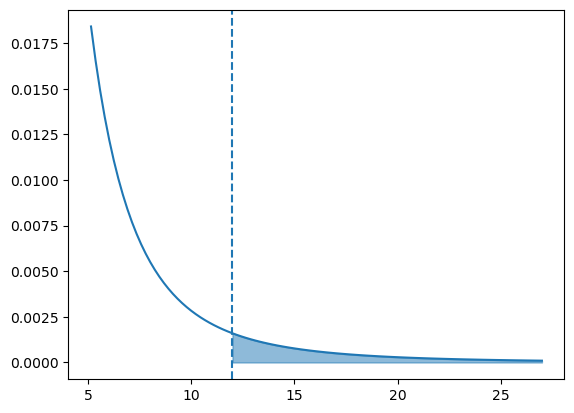

In [19]:
x_range = np.linspace(f.ppf(0.95, m-1, m*(n-1)), f.ppf(0.999, m-1, m*(n-1)), 100)
x_shade = np.linspace(F, f.ppf(0.999, m-1, m*(n-1)), 100)

plt.plot(x_range, f.pdf(x_range, m-1, m*(n-1)), color='tab:blue')
plt.axvline(F, color='tab:blue', linestyle='--')
plt.fill_between(x_shade, f.pdf(x_shade, m-1, m*(n-1)), color='tab:blue', alpha=0.5)
plt.show()

In [20]:
from scipy.stats import f_oneway

f_oneway(x.iloc[:, 0], x.iloc[:, 1], x.iloc[:, 2])

F_onewayResult(statistic=12.0, pvalue=0.008000000000000002)

Since the p-value is very close to 0, we reject the null. The means are different.

*Note 1: The p-value is lower than the "standard" alphas 0.01, 0.05, and 0.10 which is why we reject the null without really pre-defining the alpha.*

*Note 2: The F-distribution is actually the ratio of two Chi-Squared distributions!*

### Assumptions of ANOVA

1. Independence

    - If variables are discrete, do a Chi-squared test.
    
    - If variables are continuous, it's actually not that easy to test. You can try measuring their [`Mutual Information`](https://en.wikipedia.org/wiki/Mutual_information).


2. Normality

    - Use a [`Shapiro-Wilk test`](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) (most powerful!)


3. Homoscedasticity

    - Use [`Levene's test`](https://en.wikipedia.org/wiki/Levene%27s_test)

*Note: What about when I want to do multiple tests to do pairwise comparison of means? Read ISLRv2 Chapter 13!*

### Example - ANOVA/F-Test in Linear Regression

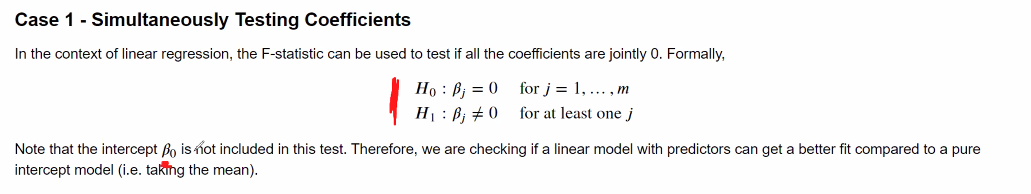

---

## Example - ANOVA/F-Test in Linear Regression

### Case 1 - Simultaneously Testing Coefficients

In the context of linear regression, the F-statistic can be used to test if all the coefficients are jointly 0. Formally,

\begin{align*}
    H_0 &: \beta_j = 0 \ \ \ \ \ \text{for} \ j = 1, \ldots, m\\ 
    H_1 &: \beta_j \neq 0 \ \ \ \ \ \text{for at least one} \ j
\end{align*}

Note that the intercept $\beta_0$ is not included in this test. Therefore, we are checking if a linear model with predictors can get a better fit compared to a pure intercept model (i.e. taking the mean).

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

df = pd.read_csv('Advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


since p value is really small, we reject H0

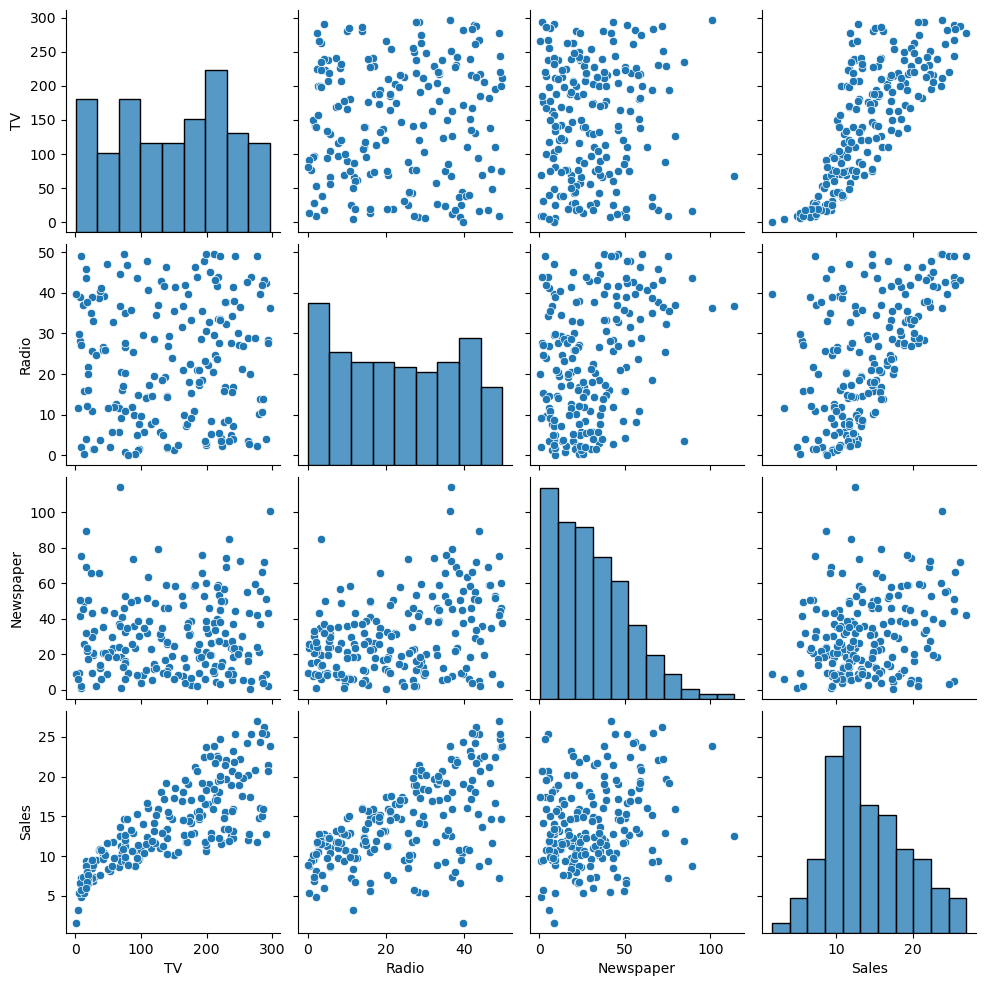

In [33]:
sns.pairplot(df)
plt.show()

In [35]:
target = ['Sales'] # called endog, dep var
features = ['TV', 'Radio', 'Newspaper'] # called exog, ind var

model = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           1.58e-96
Time:                        15:00:49   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

---

### Interlude

Let's define some terms.

#### 1. $R^2$ Statistic (same $R^2$ in ML1)

\begin{align*}
    R^2 &= 1 - \frac{\text{sum of squared errors}}{\text{total sum of squares}}\\
    &= 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}\\
\end{align*}

Used as a goodness-of-fit metric. It measures the proportion of variance explained by its linear predictors.

A low $R^2$ might mean that your linear model is wrong, or that the true error variance $\sigma^2$ is high, or both.

It does not measure **predictive accuracy/error**, i.e. how well your model predicts the target variable.

See [`here`](https://internal.ncl.ac.uk/ask/numeracy-maths-statistics/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html) for more examples.

#### 2. Adjusted $R^2$ Statistic

\begin{align*}
    \bar{R}^2 &= 1 - (1 - R^2)\frac{n-1}{n-p-1}
\end{align*}

where $p$ is the number of features.

The adjusted $R^2$ statistic attempts to account for the phenomenon of the $R^2$ automatically and spuriously increasing when more features are added to the model. It is always less than or equal to $R^2$.

#### 3. AIC

The [`Akaike information criterion`](https://en.wikipedia.org/wiki/Akaike_information_criterion) is a statistic that attempts to measure the *prediction error*. **Lower AIC** is better (more negative).

\begin{align*}
    \text{AIC} &= 2k - 2\ln(\hat{L})
\end{align*}

where $k$ is the number of parameters ($p+1$) and $\hat{L}$ is the maximum value of the likelihood function.

Leave-one-out cross-validation (LOOCV) is asymptotically equivalent to AIC!

#### 4. BIC

The [`Bayesian information criterion`](https://en.wikipedia.org/wiki/Bayesian_information_criterion) (also called Schwarz information criterion) is similar to AIC but penalizes models with more parameters.

\begin{align*}
    \text{BIC} &= k \ln(n) - 2\ln(\hat{L})
\end{align*}

where $n$ is the number of observations.

#### 5. Durbin-Watson

Tests if the residuals are autocorrelated at lag 1. Accept $H_0$ that the residuals are NOT correlated. if pval is high

#### 6. Jarque-Bera

Tests if the residuals are normally distributed. Accept $H_0$ that the residuals are normal. if pval is high

---

### Case 2 - Using ANOVA for Feature Selection in Linear Regression

We can actually use ANOVA to compare different fits of linear models. This allows us to determine whether or not *adding* a predictor significantly improves the fit.

*Note 1: This only applies to nested linear models.*

*Note 2: The notion of "fit" here is from a sum of squares perspective (i.e. variance).*

$H_0$ in this case is that there is no significant difference between models.

In [36]:
from statsmodels.stats.anova import anova_lm

target = ['Sales']

m2 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df).fit()
m1 = smf.ols(formula='Sales ~ TV + Radio', data=df).fit()

res = anova_lm(m1, m2) # m2 should be the "bigger" model
print(res)

print('---')
print('---')
print('---')

print(m1.summary())
print(m2.summary())

   df_resid         ssr  df_diff   ss_diff         F    Pr(>F)
0     197.0  556.913980      0.0       NaN       NaN       NaN
1     196.0  556.825263      1.0  0.088717  0.031228  0.859915
---
---
---
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           4.83e-98
Time:                        15:36:04   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
         

notes:
 - since prob(JB) or pvalue of our normality test.... it is not normal. Thus OLS is not an appropriate method, might want to do a log transformation to make it normal, or use GLMs instead of OLS

### Bonus - Can we still improve this linear model?

In [26]:
target = ['Sales']

m2 = model = smf.ols(formula='Sales ~ TV + Radio + TV*Radio', data=df).fit()
m1 = model = smf.ols(formula='Sales ~ TV + Radio', data=df).fit()

res = anova_lm(m1, m2) # m2 should be the "bigger" model
print(res)

print('---')
print('---')
print('---')

print(m1.summary())
print(m2.summary())

   df_resid         ssr  df_diff     ss_diff           F        Pr(>F)
0     197.0  556.913980      0.0         NaN         NaN           NaN
1     196.0  174.483383      1.0  382.430597  429.590463  2.757681e-51
---
---
---
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           4.83e-98
Time:                        14:14:17   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                           

notes:
 - used feature engineering by adding a derived feature and thus improving the $R^2$ and predictive power metrics (AIC BIC)

---

## Exercise - Analyzing Diets

Data from [`here`](https://bioinformatics-core-shared-training.github.io/linear-models-r/anova.html).

Consider the following dataset:

In [27]:
df = pd.read_csv('diet.csv')
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


#### Q1. Are the group means of the pre-diet weights the same?

In [28]:
# Eye-ball the means
for d in df['Diet'].unique():
    print(d, '-', df[df['Diet'] == d]['pre.weight'].mean())

2 - 71.11111111111111
1 - 72.875
3 - 73.62962962962963


In [29]:
d1 = df[df['Diet'] == 1]['pre.weight'].to_numpy()
d2 = df[df['Diet'] == 2]['pre.weight'].to_numpy()
d3 = df[df['Diet'] == 3]['pre.weight'].to_numpy()
f_oneway(d1, d2, d3)

F_onewayResult(statistic=0.5840587462393533, pvalue=0.5601464006908716)

The p-value is greater than the standard alphas. The means are *probably* equal.

#### Q2. Are the group means of the post-diet weights the same?

In [30]:
# Eye-ball the means
for d in df['Diet'].unique():
    print(d, '-', df[df['Diet'] == d]['weight6weeks'].mean())

2 - 68.08518518518518
1 - 69.575
3 - 68.4814814814815


In [31]:
d1 = df[df['Diet'] == 1]['weight6weeks'].to_numpy()
d2 = df[df['Diet'] == 2]['weight6weeks'].to_numpy()
d3 = df[df['Diet'] == 3]['weight6weeks'].to_numpy()
f_oneway(d1, d2, d3)

F_onewayResult(statistic=0.18336188466434622, pvalue=0.8328388999845644)

Once again, the p-value is greater than the standard alphas. The means are *probably* equal.

#### What other things can we test?